In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=30)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred))

ValueError: X has 784 features, but RandomForestClassifier is expecting 30 features as input.

In [25]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.model_selection import RandomizedSearchCV

In [6]:
df = pd.read_csv("Datasets/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df['is_male'] = df['Genre'].map({'Male' : 1, 'Female' : 0})
df.drop('Genre', axis=1, inplace=True)

In [10]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),is_male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [ ]:
random_search = RandomizedSearchCV(
    estimator=DBSCAN,
    
    cv=5,
    n_jobs=-1
)

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

dbscan = DBSCAN(eps= 0.5,
                min_samples=3)

dbscan.fit(scaled_data)

DBSCAN(min_samples=3)

In [21]:
kmeans = KMeans(n_clusters=3,
    n_init='auto')

kmeans.fit(scaled_data)

KMeans(n_clusters=3)

In [ ]:
from sklearn.metrics import silhouette_score

In [23]:
kmeans_predict = kmeans.predict(scaled_data)
dbscan_predict = dbscan.fit_predict(scaled_data)
print(kmeans_predict)
print(dbscan_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 2 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[-1  1 -1  0 -1  0 -1 -1 -1  0 -1 -1  2  0 -1  1 -1  1 -1 -1 -1  1 -1  1
  2  1  3 -1  3  4 -1  4 -1 -1  2  4 -1 -1  3  4 -1 -1  7  6 -1  4  5  6
  6  6  5 -1  6 -1  5  7  5  8  6  7  8  9 -1  5 10  9  5 -1  9  6  8  5
  5  5 10 13  5 -1 11  5 10 -1 -1  5 11 12 -1 11 -1  5 15 13 12 16 11 13
  5 11 12 13 11  5 14 13 12 11 15 12 14 14 14 11 16 13 11 11 15 -1  5 -1
 13 16 -1 -1 19 17 -1 -1 -1 18 -1 18 19 17 20 17 -1 18 20 17 -1 21 19 17
 20 21 -1 17 -1 21 22 21 -1 17 -1 17 -1 17 -1 17 -1 17 -1 17 -1 17 22 17
 24 23 22 23 22 -1 -1 17 -1 23 -1 -1 24 17 -1 17 24 -1 -1 -1 -1 17 -1 -1
 -1 17 -1

In [24]:
print("Kmeans prediction: ", silhouette_score(scaled_data, kmeans_predict))
print("dbscan prediction: ", silhouette_score(scaled_data, dbscan_predict))

Kmeans prediction:  0.24284647173180557
dbscan prediction:  0.08056110582841275


In [33]:
values = []

for i in range (2, 21):
    kmeans = KMeans(n_clusters=i,
    n_init='auto')
    kmeans.fit(scaled_data)
    kmeans_predict = kmeans.predict(scaled_data)
    values.append(silhouette_score(scaled_data, kmeans_predict))
values

[np.float64(0.24828688137314756),
 np.float64(0.23906907964046747),
 np.float64(0.26730364308128485),
 np.float64(0.3103236808276139),
 np.float64(0.30664712008649275),
 np.float64(0.3242410891344968),
 np.float64(0.33506299676263734),
 np.float64(0.347774227499961),
 np.float64(0.3659563152716879),
 np.float64(0.3827779468493264),
 np.float64(0.38641962442633215),
 np.float64(0.3834262946616496),
 np.float64(0.4099335557533213),
 np.float64(0.4046219621893387),
 np.float64(0.4075551441915537),
 np.float64(0.39930186731605405),
 np.float64(0.3836934891062967),
 np.float64(0.36643187003209476),
 np.float64(0.3913098214408484)]

In [30]:
import matplotlib.pyplot as plt

In [32]:
values[1]

(3, np.float64(0.2458526214616898))

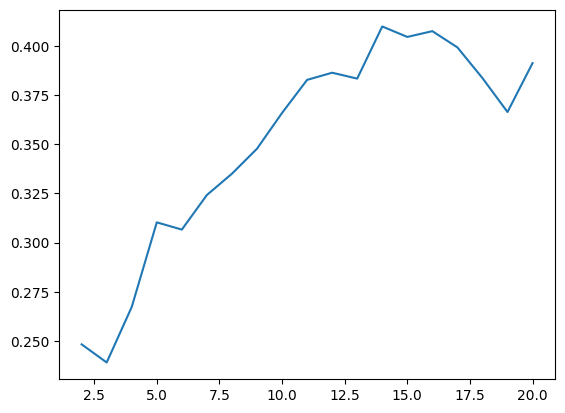

In [34]:
plt.plot(range(2, 21), values)
plt.show()

In [ ]:
values = []

for i in range (2, 21):
    dbscan = DBSCAN(eps= 0.5,
                    min_samples=3)
    kmeans.fit(scaled_data)
    kmeans_predict = kmeans.predict(scaled_data)
    values.append(silhouette_score(scaled_data, kmeans_predict))